<a href="https://colab.research.google.com/github/karthika-shankar/bank_churnanalysis_tcs/blob/main/Bineeta/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
df=pd.read_csv('with_sentiment.csv')


In [ ]:
df.drop(['CustomerID', 'Name','Emoji_Sentiment', 'Text_Sentiment','Account_Open_Date', 'Last_Transaction_Date','Customer_Review'],axis=1,inplace=True)

In [ ]:
numerical_columns=list(df.select_dtypes(include=['int64','float64']))
categorical_columns=df.select_dtypes(include=['object'])
list_of_categorical_columns=list(categorical_columns)
print(list_of_categorical_columns)
list_of_numerical_columns=[col for col in numerical_columns if col not in 'Exited']
print(list_of_numerical_columns)

['Gender', 'Geography', 'Native_Place', 'Marital_Status', 'Account_Type', 'Loan_Status', 'Branch_Code']
['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Monthly_Income', 'CreditScore', 'EMI_Amount', 'Combined_Sentiment']


Splitting into train and test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df,df['Exited'],test_size=0.2,random_state=42)
X_train.drop('Exited',axis=1,inplace=True)
X_test.drop('Exited',axis=1,inplace=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 18)
(80000,)
(20000, 18)
(20000,)


Normalising Numerical Values

In [ ]:
sc=StandardScaler()
scaled=sc.fit_transform(X_train[list_of_numerical_columns])
scale_train=pd.DataFrame(scaled,columns=list_of_numerical_columns,index=X_train.index)
scale_test=pd.DataFrame(sc.transform(X_test[list_of_numerical_columns]),index=X_test.index,columns=list_of_numerical_columns)
scale_train.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Monthly_Income,CreditScore,EMI_Amount,Combined_Sentiment
75220,-0.741169,-0.658077,-0.604524,-1.345562,0.995087,-0.994366,-0.690413,-0.690413,-1.582920,-0.666568,-1.445443
48955,1.194749,-0.161991,1.209569,-1.345562,-1.004937,1.005666,0.294083,0.294083,-0.398863,-0.202013,0.624162
44966,-1.148730,0.995544,-0.802211,-0.451226,-1.004937,-0.994366,0.459807,0.459807,1.377224,-1.226886,0.447048
13568,-1.352511,-1.650251,-0.501125,0.443110,0.995087,1.005666,-1.267915,-1.267915,-1.036874,-1.226886,0.624162
92727,-0.741169,0.168734,1.171901,0.443110,0.995087,-0.994366,0.732228,0.732228,-1.410484,1.062942,1.167533


Encoding Categorical Values

In [ ]:
encoder=OneHotEncoder(sparse_output=False)
encoder_array=encoder.fit_transform(X_train[list_of_categorical_columns])
encoder_train_df=pd.DataFrame(encoder_array,columns=encoder.get_feature_names_out(list_of_categorical_columns),index=X_train.index)
encoder_test_df=pd.DataFrame(encoder.transform(X_test[ list_of_categorical_columns]),index=X_test.index,columns=encoder.get_feature_names_out(list_of_categorical_columns))
encoder_train_df.columns

Index(['Gender_Female', 'Gender_Male', 'Gender_Other', 'Geography_Delhi',
       'Geography_Gujarat', 'Geography_Karnataka', 'Geography_Maharashtra',
       'Geography_Rajasthan', 'Geography_Tamil Nadu', 'Geography_Telangana',
       ...
       'Branch_Code_BR091', 'Branch_Code_BR092', 'Branch_Code_BR093',
       'Branch_Code_BR094', 'Branch_Code_BR095', 'Branch_Code_BR096',
       'Branch_Code_BR097', 'Branch_Code_BR098', 'Branch_Code_BR099',
       'Branch_Code_BR100'],
      dtype='object', length=141)

In [ ]:
combined_df_train=pd.concat([scale_train,encoder_train_df],axis=1)
combined_df_test=pd.concat([scale_test,encoder_test_df],axis=1)

In [ ]:
combined_df = pd.concat([combined_df_train, combined_df_test], axis=0, ignore_index=True)
combined_df.to_csv('preprocessed_dataset.csv', index=False)


Training the model

In [ ]:
lg=LogisticRegression(solver='liblinear',class_weight='balanced')
lg.fit(combined_df_train,y_train)
prediction_train=lg.predict(combined_df_train)
prediction_test=lg.predict(combined_df_test)

In [ ]:
accuracy_test=accuracy_score(y_test,prediction_test)
accuracy_train=accuracy_score(y_train,prediction_train)
print(f"Accuracy of test data: {accuracy_test:.3f}")
print(f"Accuracy of train data: {accuracy_train:.3f}")
print(lg.coef_.tolist())

Accuracy of test data: 0.881
Accuracy of train data: 0.878
[[0.4003284952665919, 0.23800443326754944, -0.0018483043297048364, 0.013130428408918765, -0.0028132593132544695, -1.8320170393290787, -0.21937264023144268, -0.21937243344084764, -0.015949170984590602, 0.7449694696606509, -1.6280299209856182, -0.18660640418752192, -0.20664052239283817, -0.20098103372738427, -0.10602125599106821, -0.06787121988298372, -0.0189051568324804, -0.06466635679370875, -0.09216988355597092, -0.04595402527186466, -0.08482443429439525, -0.033834485538060954, -0.0799811421471154, -0.09260857101710061, -0.06566751866130464, -0.023987559767434306, -0.08630845055259367, -0.03154955586527046, -0.01768202228820456, -0.047708303345099665, -0.05632211436808693, -0.1254959317728257, -0.04689793266969325, -0.11035467678507403, -0.18356189860765987, -0.15026589852230945, -0.15004548639314919, -0.08751647781235257, -0.11634037627853587, -0.10332760432215543, -0.054771983977639375, -0.039043072816139626, -0.068114575659

In [ ]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     14106
           1       0.75      0.89      0.81      5894

    accuracy                           0.88     20000
   macro avg       0.85      0.88      0.86     20000
weighted avg       0.89      0.88      0.88     20000



<Axes: >

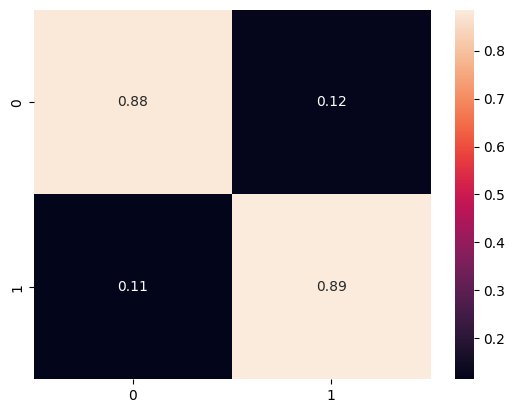

In [ ]:
confusion=confusion_matrix(y_test,prediction_test,normalize='true')
sns.heatmap(confusion,annot=True)

ROC Curve

In [ ]:
y_proba = lg.predict_proba(combined_df_test)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


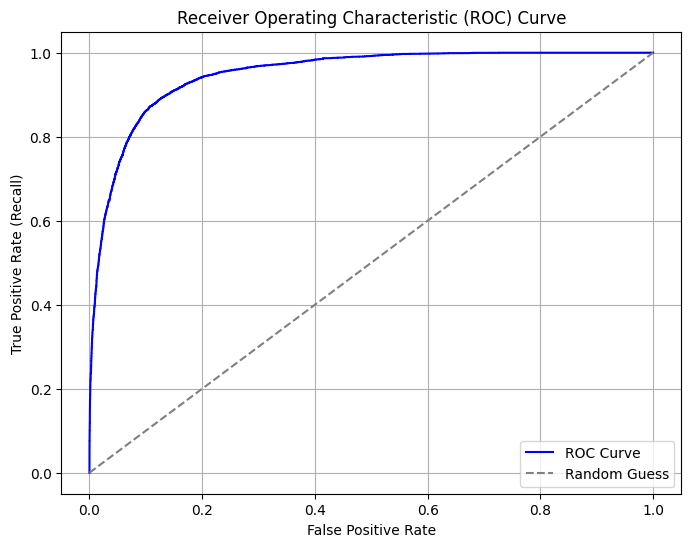

ROC-AUC Score: 0.9497


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")
